In [2]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

### Parsing raw data - all India - Urban and Rural

In [3]:
# colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
# dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
# columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
# dfTUS2.columns =  columns2

# colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
# dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
# columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
# dfTUS4.columns =  columns4

# colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
# dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
# columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
# dfTUS5.columns =  columns5

#### Filtering only rural India data and choosing the state of Maharashtra NSS code 27 

In [4]:
# dfTUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
# dfTUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
# dfTUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

# dfTUS2.to_csv('MHTUS2.csv')
# dfTUS4.to_csv('MHTUS4.csv')
# dfTUS5.to_csv('MHTUS5.csv')

#### Reading Maharashtra (rural) data

In [5]:
dfTUS2 = pd.read_csv('MHTUS2.csv')
dfTUS4 = pd.read_csv('MHTUS4.csv')
dfTUS5 = pd.read_csv('MHTUS5.csv')

#### Assigning individual unique id

In [6]:
dfTUS2['id'] = dfTUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS2 = dfTUS2.set_index('id')

dfTUS4['id'] = dfTUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS4 = dfTUS4.set_index('id')

dfTUS5['id'] = dfTUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS5 = dfTUS5.set_index('id')

#### Merging demographic data 

In [7]:
## Demographic details analysis

TUS_merged = pd.merge(dfTUS2, dfTUS4, on = 'id')
#TUS_merged.isna().sum()
#TUS_merged.shape

#### Merging individual ids to their activity records

In [8]:
TUS_full = pd.merge(dfTUS5, TUS_merged, left_index=True, right_index = True)
TUS_full.index.nunique()

19497

#### Dropping rest of the columns not relevant to Time Use

In [9]:
col = ['FSU', 'Sector', 'State', 'District', 'Stratum',
       'Sub-stratum', 'Sample HHID', 'PersonID',
       'Paid-unpaid', 'Type of enterprise', 'NSC', 'Multiplier',
       'Unnamed: 0_x', 'FSU_x', 'Sector_x', 'State_x', 'District_x',
       'Stratum_x', 'Sub-stratum_x', 'Sample HHID_x', 'PersonID_x',
       'RelationToHead', 'Gender', 'Age', 'MaritalStatus', 'Education',
       'PrincipleActivity', 'Industry of work', 'NSC_x', 'Multiplier_x',
       'Unnamed: 0_y', 'FSU_y', 'Sector_y', 'State_y', 'District_y',
       'Stratum_y', 'Sub-stratum_y', 'Sample HHID_y', 'PersonID_y',
       'Day of the week', 'Type of the day', 'Response code', 'NSC_y',
       'Multiplier_y','Unnamed: 0']
    
TUS_MH = TUS_full.drop(columns = col, axis=1)
TUS_MH = TUS_MH.reset_index()
del(TUS_full)

#### Identifying activity groups that are correlated to electricity usage

In [10]:
# TUS_MH = TUS_MH[(TUS_MH["Activity group"] == 12) |
#                     (TUS_MH["Activity group"] == 31) |
#                     (TUS_MH["Activity group"] == 32) |
#                     (TUS_MH["Activity group"] == 34) |
#                     (TUS_MH["Activity group"] == 62) |
#                     (TUS_MH["Activity group"] == 84) |
#                     (TUS_MH["Activity group"] == 91) |
#                     (TUS_MH["Activity group"] == 92) |
#                     (TUS_MH["Activity group"] == 93) ]
# # #TUS_MH.head(20)


In [11]:
# TUS_MH["Activity group"] = TUS_MH["Activity group"].replace({12:1,31:2,32:3,34:4,62:5,91:10,92:8,93:9})
# TUS_MH["Activity group"].unique()

### Seperate TV and radio

In [12]:
# TUS_MH["Activity group"] = np.where(TUS_MH["Activity code"] == 842 & TUS_MH["Activity group"] == 84, TUS_MH["Activity code"],TUS_MH["Activity group"])
# TUS_MH["Activity group"] = np.where(TUS_MH["Activity code"] == 843 & TUS_MH["Activity group"] == 84, TUS_MH["Activity code"],TUS_MH["Activity group"])
# #(TUS_MH["Activity group"] == 842).value_counts()
# TUS_MH["Activity group"].unique()

In [13]:
# # 1 - 12 - Employement related activities in the house
# # 2 - 31 - Meal prep
# # 3 - 32 - Cleaning and maintaining of dwelling
# # 4 - 34 - Laundary
# # 5 - 62 - Study at home
# # 6 - 84 - Mass media use (watching TV)
# # 7 - 84 - Mass media use (Listening to radio)
# # 8 - 92 - eating and drinking
# # 9 - 93 - Personal care
# # 10 - 91 - Sleeping and incidental naps

conditions = [(TUS_MH["Activity group"] == 12), 
              (TUS_MH["Activity group"] == 31),
              (TUS_MH["Activity group"] == 32), 
              (TUS_MH["Activity group"] == 34),
              (TUS_MH["Activity group"] == 62),
              (TUS_MH["Activity group"] == 91),
              (TUS_MH["Activity group"] == 92),
              (TUS_MH["Activity group"] == 93),
              (TUS_MH["Activity code"] == 842),               
              (TUS_MH["Activity code"] == 843)]
values = [1,2,3,4,5,10,8,9,6,7]

TUS_MH['Activity group'] = np.select(conditions, values)
TUS_MH["Activity group"].unique()

array([10,  0,  9,  8,  1,  6,  3,  4,  2,  5,  7])

In [14]:
TUS_MH = TUS_MH.loc[(TUS_MH[["Activity group"]] != 0).all(axis=1)]
TUS_MH["Activity group"].unique()

array([10,  9,  8,  1,  6,  3,  4,  2,  5,  7])

#### Converting time from and time to in datetime 

In [15]:
TUS_MH["Start_time"] = pd.to_datetime(TUS_MH['Time from'], format="%H:%M").dt.time
TUS_MH["End_time"] = pd.to_datetime(TUS_MH['Time to'], format="%H:%M").dt.time

In [19]:
times = np.arange(0,24,0.5)
nt = times.shape[0] # 48 time intervals
state_min = 1
state_max = 10
nstate_tot = state_max-state_min+1
sleeping_state = 10

start_time_matrix = []

#Initialise for each activity at each time interval

for j in range(nstate_tot):
    start_time_matrix.append(np.zeros(nt))
    
# Initialise matrix for duration of each activity
no_arr = np.array([])
duration_matrix_notime = []
for k in range(nstate_tot):
    duration_matrix_notime.append(no_arr)

#Dividing duration matrix into four different timezones

duration_matrix_timezones = []
no_arr = np.array([])
for j in range(4):
    ar1 = []
    for k in range(nstate_tot):
        ar1.append(no_arr)
    duration_matrix_timezones.append(ar1)

# Sorting individual ids    
    
ids = np.sort(TUS_MH['id'].unique())

# Calculate number of acitivities (nentries) recorded by individual id, set index of activities in temp df and find nunique activitites
# Consider all other activities than sleeping state 10 - this requires seperate calculation due to overlapping day after midnight
# Time zones - 
# 0 - 6am-12pm Morning, 
# 1 - 12pm-5pm Afternoon, 
# 2 - 5pm-10pm Evening, 
# 3 - 10pm-6am night.

# Calculate duration of each activity starting in each time zone

for idi in ids:
    TUS_MH_temp0 = TUS_MH[TUS_MH['id'] == idi].copy()
    activites = TUS_MH_temp0['Activity group'].unique()
    for activity in activites:
        TUS_MH_temp = TUS_MH_temp0[TUS_MH_temp0['Activity group'] == activity].copy()
        nentries = TUS_MH_temp.index.nunique()
        if(nentries > 0 and activity != sleeping_state):  # sleeping state is considered seperately
                time_stampm1 = TUS_MH_temp['Start_time'].iloc[0]
                time_stampm2 = TUS_MH_temp['End_time'].iloc[0]
                
                current_duration =  (time_stampm2.hour - time_stampm1.hour) + 0.5*(time_stampm2.minute-time_stampm1.minute)/30 # Duration of time activity continues - in 0.5 hours
                timepos = np.where(times == (time_stampm1.hour+0.5*time_stampm1.minute/30))[0][0] # position of time interval when the activity is happening - 48 intevrals
                start_time_matrix[activity-1][timepos] += 1
                if(nentries == 1):
                    arr_temp = np.concatenate((duration_matrix_notime[activity-1],np.array([current_duration])))
                    duration_matrix_notime[activity-1] = arr_temp 
                    if(time_stampm1.hour >= 6 and  time_stampm1.hour <= 12):
                        tzone = 0
                    if(time_stampm1.hour > 12 and  time_stampm1.hour <= 17):
                        tzone = 1
                    if(time_stampm1.hour > 17 and  time_stampm1.hour <= 22):
                        tzone = 2
                    if(time_stampm1.hour > 22):
                        tzone = 3            
                    arr_temp = np.concatenate((duration_matrix_timezones[tzone][activity-1],np.array([current_duration])))
                    duration_matrix_timezones[tzone][activity-1] = arr_temp
                else:
                    for i in np.arange(1,nentries,1):
                        time_stamp1 = TUS_MH_temp['Start_time'].iloc[i]
                        time_stamp2 = TUS_MH_temp['End_time'].iloc[i]
                        time_change_duration = (time_stamp2.hour - time_stamp1.hour) + 0.5*(time_stamp2.minute-time_stamp1.minute)/30   
                        if(time_stamp1 == time_stampm2 and i != nentries-1):
                            current_duration = current_duration + time_change_duration
                            time_stampm1 = time_stamp1
                            time_stampm2 = time_stamp2
                        else:
                            arr_temp = np.concatenate((duration_matrix_notime[activity-1],np.array([current_duration])))
                            duration_matrix_notime[activity-1] = arr_temp 
                            if(time_stampm1.hour >= 4 and  time_stampm1.hour <= 10):
                                tzone = 0
                            if(time_stampm1.hour > 10 and  time_stampm1.hour <= 16):
                                tzone = 1
                            if(time_stampm1.hour > 16 and  time_stampm1.hour <= 20):
                                tzone = 2
                            if(time_stampm1.hour > 20):
                                tzone = 3            
                            arr_temp = np.concatenate((duration_matrix_timezones[tzone][activity-1],np.array([current_duration])))
                            duration_matrix_timezones[tzone][activity-1] = arr_temp
                            
                            time_stampm1 = time_stamp1
                            time_stampm2 = time_stamp2
                            current_duration =  (time_stampm2.hour - time_stampm1.hour) + 0.5*(time_stampm2.minute-time_stampm1.minute)/30
                            timepos = np.where(times == (time_stampm1.hour+0.5*time_stampm1.minute/30))[0][0]
                            start_time_matrix[activity-1][timepos] += 1

tot_ids = np.shape(ids)[0]        
for i in range(nstate_tot):
    if(i != (sleeping_state-1)):
        start_time_matrix[i] = start_time_matrix[i]/tot_ids

16
17
21
39
12
14
20
21
32
40
13
13
26
10
12
14
15
40
16
22
40
42
15
17
18
20
41
43
10
11
10
11
11
26
18
20
11
14
33
16
17
20
41
14
16
18
29
32
39
20
22
36
44
16
18
37
18
20
42
43
12
15
12
13
12
14
14
16
42
12
17
19
11
15
19
20
28
12
14
28
12
12
33
43
14
16
18
29
30
24
25
19
20
22
38
10
15
21
22
24
13
13
39
41
10
11
13
16
17
18
16
17
18
17
19
21
15
17
19
21
45
10
15
36
38
12
15
17
39
42
10
12
12
39
39
14
15
18
14
16
18
33
35
39
18
19
25
37
14
15
18
44
11
13
15
16
18
42
12
14
28
33
40
18
20
38
40
16
18
19
20
24
38
12
14
44
12
14
16
18
12
27
32
33
12
26
31
38
14
16
41
12
13
16
17
19
23
11
12
12
32
18
19
20
45
13
15
15
36
40
16
19
22
23
18
20
20
22
22
18
20
21
16
19
21
21
22
24
19
21
21
16
18
19
12
14
20
20
29
12
14
16
20
28
34
17
20
16
18
21
22
23
14
16
16
20
23
17
20
35
43
17
20
16
18
21
22
23
13
18
22
18
20
16
21
21
16
21
21
16
18
17
20
43
16
17
21
22
27
16
19
15
17
20
21
34
17
19
16
40
44
16
18
28
15
18
26
18
21
44
16
19
21
22
16
18
19
23
29
36
18
21
44
16
19
21
22
16
18
19
23
29
36
1

15
17
19
27
32
24
26
28
13
15
35
12
14
14
41
13
17
21
21
10
12
13
42
11
14
18
12
15
23
14
16
40
12
14
16
19
27
29
14
16
38
12
16
16
15
27
12
14
16
22
26
31
12
14
16
24
36
14
16
42
16
18
16
18
18
22
12
14
40
12
14
14
19
34
12
14
14
16
43
14
16
16
18
32
15
17
41
12
17
21
41
14
27
44
13
15
15
31
15
16
19
12
14
14
40
10
10
14
29
10
10
35
40
11
11
35
40
13
15
42
13
15
17
39
12
27
42
11
13
19
25
25
13
15
44
13
14
14
27
11
13
13
16
22
12
14
43
14
16
30
38
14
16
16
14
16
20
26
32
16
18
14
16
16
31
38
16
18
19
43
16
16
33
14
16
16
43
16
16
19
38
11
13
18
26
15
17
44
14
16
16
25
33
16
18
19
42
15
17
44
15
17
18
18
26
16
18
44
12
14
14
16
16
31
11
23
34
38
11
12
40
14
16
18
13
15
41
11
13
13
27
32
12
14
14
17
41
16
17
18
24
15
17
17
19
15
17
39
11
22
23
24
22
28
36
15
17
18
16
18
43
15
16
18
22
27
14
17
18
11
12
16
18
12
26
27
28
15
16
37
44
16
17
41
11
12
16
18
19
26
12
14
18
24
10
18
23
14
16
44
11
12
16
17
20
24
10
10
13
19
11
37
11
16
16
41
43
15
16
11
12
16
18
21
39
12
26
27
30
13
25
12
13
1

16
17
19
13
20
24
25
13
14
16
18
20
21
16
18
19
14
16
13
14
16
18
19
45
16
18
19
14
15
15
13
14
14
20
21
27
12
24
25
18
20
16
18
19
21
39
14
16
19
38
12
13
14
9
10
13
14
15
16
14
15
41
12
12
13
15
16
20
12
13
13
9
10
12
14
14
24
18
19
23
26
36
16
17
18
15
16
16
18
19
21
15
16
16
18
19
21
16
17
18
12
12
16
16
12
14
15
12
13
14
16
18
26
11
20
38
12
24
34
36
12
13
13
9
10
12
14
16
25
18
19
23
26
36
12
13
14
9
10
13
14
15
16
24
12
13
13
9
10
12
14
16
25
18
19
23
26
36
12
13
42
9
10
13
14
15
16
18
19
20
16
17
18
16
17
18
20
28
29
18
19
20
18
20
36
14
15
39
12
13
21
23
26
28
14
17
17
14
15
16
22
34
18
19
21
18
20
21
36
14
14
43
12
13
13
20
24
26
12
13
14
9
10
13
14
15
16
9
22
23
9
9
9
13
19
25
14
14
16
22
9
22
23
12
17
19
38
10
10
12
14
40
10
15
19
12
14
14
14
16
20
24
10
10
13
10
10
11
12
38
10
10
13
39
10
12
12
14
22
12
12
14
19
12
12
12
14
19
38
16
16
22
22
34
12
12
14
16
20
16
18
21
14
14
16
17
38
42
16
16
16
16
17
37
11
11
13
15
23
33
12
12
16
14
14
16
18
22
32
16
16
17
22
35
14
14
12
1

KeyboardInterrupt: 

In [17]:
current_duration

1.0

In [16]:
nsleeping_entries = 0
for idi in ids:
    TUS_MH_temp0 = TUS_MH[TUS_MH['id'] == idi].copy()
    activity = sleeping_state
    TUS_MH_temp = TUS_MH_temp0[TUS_MH_temp0['Activity group'] == activity].copy()
    nentries = TUS_MH_temp.index.nunique()
    if(nentries > 1):
        nsleeping_entries += 1
        
nsleeping_entries/tot_ids

0.9902036210699082

In [17]:
for idi in ids:
    TUS_MH_temp0 = TUS_MH[TUS_MH['id'] == idi].copy()
    activity = sleeping_state
    TUS_MH_temp = TUS_MH_temp0[TUS_MH_temp0['Activity group'] == activity].copy()
    nentries = TUS_MH_temp.index.nunique()
    if(nentries == 2):
        time_stamp1 = TUS_MH_temp['End_time'].iloc[0]
        time_stamp2 = TUS_MH_temp['Start_time'].iloc[1]
        if(time_stamp2.hour > 20):
            current_duration = 24 - time_stamp2.hour + 0.5*(time_stamp2.minute)/30  + time_stamp1.hour + 0.5*(time_stamp1.minute)/30
            arr_temp = np.concatenate((duration_matrix_notime[activity-1],np.array([current_duration])))
            duration_matrix_notime[activity-1] = arr_temp  
            arr_temp = np.concatenate((duration_matrix_timezones[3][activity-1],np.array([current_duration])))
            duration_matrix_timezones[3][activity-1] = arr_temp
            timepos = np.where(times == (time_stamp2.hour+0.5*time_stamp2.minute/30))[0][0]
            start_time_matrix[activity-1][timepos] += 1
            
    elif(nentries == 3):
        time_stamp1 = TUS_MH_temp['End_time'].iloc[0]
        time_stamp2 = TUS_MH_temp['Start_time'].iloc[2]
        if(time_stamp2.hour < 16):
            current_duration = time_stamp1.hour + 0.5*(time_stamp1.minute)/30
        else:
            current_duration = 24 - time_stamp2.hour + 0.5*(time_stamp2.minute)/30  + time_stamp1.hour + 0.5*(time_stamp1.minute)/30
        arr_temp = np.concatenate((duration_matrix_notime[activity-1],np.array([current_duration])))
        duration_matrix_notime[activity-1] = arr_temp  
        arr_temp = np.concatenate((duration_matrix_timezones[3][activity-1],np.array([current_duration])))
        duration_matrix_timezones[3][activity-1] = arr_temp
        timepos = np.where(times == (time_stamp2.hour+0.5*time_stamp2.minute/30))[0][0]
        start_time_matrix[activity-1][timepos] += 1
        #####
        time_stamp1 = TUS_MH_temp['Start_time'].iloc[1]
        time_stamp2 = TUS_MH_temp['End_time'].iloc[1]
        if(time_stamp1.hour >= 4 and  time_stamp1.hour <= 10):
            tzone = 0
        if(time_stamp1.hour > 10 and  time_stamp1.hour <= 16):
            tzone = 1
        if(time_stamp1.hour > 16 and  time_stamp1.hour <= 20):
            tzone = 2
        if(time_stamp1.hour > 20):
            tzone = 3   
        current_duration = time_stamp2.hour + 0.5*(time_stamp2.minute)/30 - time_stamp1.hour - 0.5*(time_stamp1.minute)/30
        if(current_duration > 0):
            arr_temp = np.concatenate((duration_matrix_notime[activity-1],np.array([current_duration])))
            duration_matrix_notime[activity-1] = arr_temp  
            arr_temp = np.concatenate((duration_matrix_timezones[tzone][activity-1],np.array([current_duration])))
            duration_matrix_timezones[tzone][activity-1] = arr_temp
            timepos = np.where(times == (time_stamp2.hour+0.5*time_stamp2.minute/30))[0][0]
            start_time_matrix[activity-1][timepos] += 1
    
start_time_matrix[sleeping_state-1] = start_time_matrix[sleeping_state-1]/nsleeping_entries

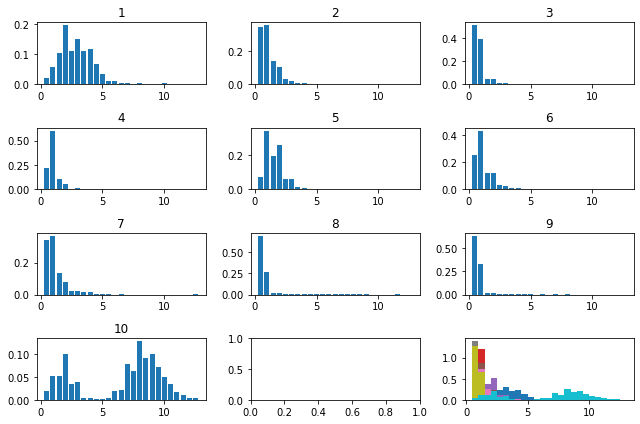

In [18]:
fig, axs = plt.subplots(4, 3, figsize = (9,6))

binarray = np.arange(0.5,13.5,0.5)

n, bins, patches = plt.hist(duration_matrix_notime[0],bins = binarray, density = True)
axs[0, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 0].set_title('1')

n, bins, patches = plt.hist(duration_matrix_notime[1],bins = binarray, density = True)
axs[0, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 1].set_title('2')

n, bins, patches = plt.hist(duration_matrix_notime[2],bins = binarray, density = True)
axs[0, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 2].set_title('3')

n, bins, patches = plt.hist(duration_matrix_notime[3],bins = binarray, density = True)
axs[1, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 0].set_title('4')

n, bins, patches = plt.hist(duration_matrix_notime[4],bins = binarray, density = True)
axs[1, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 1].set_title('5')

n, bins, patches = plt.hist(duration_matrix_notime[5],bins = binarray, density = True)
axs[1, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 2].set_title('6')

n, bins, patches = plt.hist(duration_matrix_notime[6],bins = binarray, density = True)
axs[2, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 0].set_title('7')

n, bins, patches = plt.hist(duration_matrix_notime[7],bins = binarray, density = True)
axs[2, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 1].set_title('8')

n, bins, patches = plt.hist(duration_matrix_notime[8],bins = binarray, density = True)
axs[2, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 2].set_title('9')

n, bins, patches = plt.hist(duration_matrix_notime[9],bins = binarray, density = True)
axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[3, 0].set_title('10')

plt.tight_layout()
plt.show()

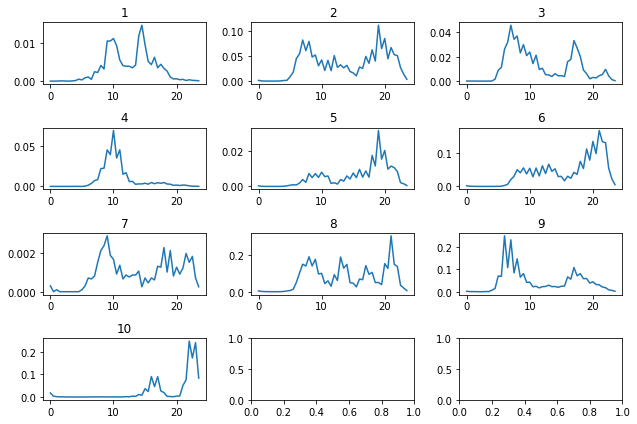

In [19]:
time_hr = [np.round(t) for t in times]
fig, axs = plt.subplots(4, 3, figsize = (9,6))

times_range = np.arange(0,24,0.5)
axs[0, 0].plot(times_range,start_time_matrix[0])
axs[0, 0].set_title('1')

axs[0, 1].plot(times_range,start_time_matrix[1])
axs[0, 1].set_title('2')

axs[0, 2].plot(times_range,start_time_matrix[2])
axs[0, 2].set_title('3')

axs[1, 0].plot(times_range,start_time_matrix[3])
axs[1, 0].set_title('4')

axs[1, 1].plot(times_range,start_time_matrix[4])
axs[1, 1].set_title('5')

axs[1, 2].plot(times_range,start_time_matrix[5])
axs[1, 2].set_title('6')

axs[2, 0].plot(times_range,start_time_matrix[6])
axs[2, 0].set_title('7')

axs[2, 1].plot(times_range,start_time_matrix[7])
axs[2, 1].set_title('8')

axs[2, 2].plot(times_range,start_time_matrix[8])
axs[2, 2].set_title('9')

axs[3, 0].plot(times_range,start_time_matrix[9])
axs[3, 0].set_title('10')

plt.tight_layout()
plt.show()

[1.6520000000000001, 1.213629267939761]
[1.9537289840494323, 0.7432312496479236]
[1.0395348837209302, 0.5783454889571453]
[8.452069025220752, 1.5222128090964817]


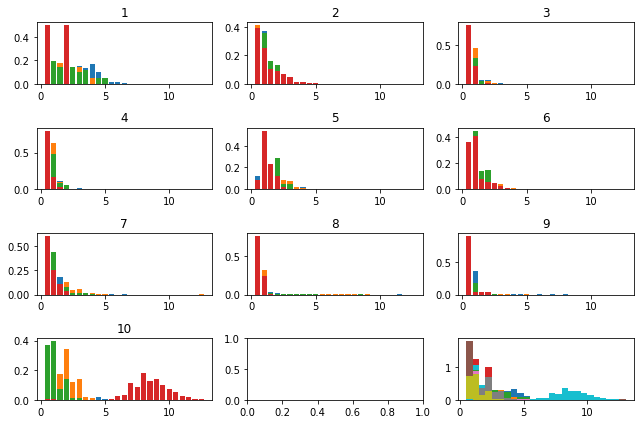

In [20]:
fig, axs = plt.subplots(4, 3, figsize = (9,6))

binarray = np.arange(0.5,13.5,0.5)

n, bins, patches = plt.hist(duration_matrix_timezones[0][0],bins = binarray, density = True)
axs[0, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][0],bins = binarray, density = True)
axs[0, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][0],bins = binarray, density = True)
axs[0, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][0],bins = binarray, density = True)
axs[0, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 0].set_title('1')

n, bins, patches = plt.hist(duration_matrix_timezones[0][1],bins = binarray, density = True)
axs[0, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][1],bins = binarray, density = True)
axs[0, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][1],bins = binarray, density = True)
axs[0, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][1],bins = binarray, density = True)
axs[0, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 1].set_title('2')

n, bins, patches = plt.hist(duration_matrix_timezones[0][2],bins = binarray, density = True)
axs[0, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][2],bins = binarray, density = True)
axs[0, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][2],bins = binarray, density = True)
axs[0, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][2],bins = binarray, density = True)
axs[0, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[0, 2].set_title('3')

n, bins, patches = plt.hist(duration_matrix_timezones[0][3],bins = binarray, density = True)
axs[1, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][3],bins = binarray, density = True)
axs[1, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][3],bins = binarray, density = True)
axs[1, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][3],bins = binarray, density = True)
axs[1, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 0].set_title('4')

n, bins, patches = plt.hist(duration_matrix_timezones[0][4],bins = binarray, density = True)
axs[1, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][4],bins = binarray, density = True)
axs[1, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][4],bins = binarray, density = True)
axs[1, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][4],bins = binarray, density = True)
axs[1, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 1].set_title('5')

n, bins, patches = plt.hist(duration_matrix_timezones[0][5],bins = binarray, density = True)
axs[1, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][5],bins = binarray, density = True)
axs[1, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][5],bins = binarray, density = True)
axs[1, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][5],bins = binarray, density = True)
axs[1, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[1, 2].set_title('6')

n, bins, patches = plt.hist(duration_matrix_timezones[0][6],bins = binarray, density = True)
axs[2, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][6],bins = binarray, density = True)
axs[2, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][6],bins = binarray, density = True)
axs[2, 0].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][6],bins = binarray, density = True)
axs[2, 0].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 0].set_title('7')

n, bins, patches = plt.hist(duration_matrix_timezones[0][7],bins = binarray, density = True)
axs[2, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][7],bins = binarray, density = True)
axs[2, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][7],bins = binarray, density = True)
axs[2, 1].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][7],bins = binarray, density = True)
axs[2, 1].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 1].set_title('8')

n, bins, patches = plt.hist(duration_matrix_timezones[0][8],bins = binarray, density = True)
axs[2, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[1][8],bins = binarray, density = True)
axs[2, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[2][8],bins = binarray, density = True)
axs[2, 2].bar(bins[:-1],0.5*n, width=0.4)
n, bins, patches = plt.hist(duration_matrix_timezones[3][8],bins = binarray, density = True)
axs[2, 2].bar(bins[:-1],0.5*n, width=0.4)
axs[2, 2].set_title('9')

n, bins, patches = plt.hist(duration_matrix_timezones[0][9],bins = binarray, density = True)
axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
mean = np.sum(0.5*n*bins[:-1])
std = np.sqrt(np.sum(0.5*n*(bins[:-1]-mean)**2))
print([mean,std])
n, bins, patches = plt.hist(duration_matrix_timezones[1][9],bins = binarray, density = True)
axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
mean = np.sum(0.5*n*bins[:-1])
std = np.sqrt(np.sum(0.5*n*(bins[:-1]-mean)**2))
print([mean,std])
n, bins, patches = plt.hist(duration_matrix_timezones[2][9],bins = binarray, density = True)
axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
mean = np.sum(0.5*n*bins[:-1])
std = np.sqrt(np.sum(0.5*n*(bins[:-1]-mean)**2))
print([mean,std])
n, bins, patches = plt.hist(duration_matrix_timezones[3][9],bins = binarray, density = True)
axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
mean = np.sum(0.5*n*bins[:-1])
std = np.sqrt(np.sum(0.5*n*(bins[:-1]-mean)**2))
print([mean,std])
axs[3, 0].set_title('10')

# n, bins, patches = plt.hist(duration_matrix_notime[9],bins = binarray, density = True)
# axs[3, 0].bar(bins[:-1],0.5*n, width=0.4)
# axs[3, 0].set_title('10')

plt.tight_layout()
plt.show()